In [ ]:
from mlwpy import *
%matplotlib inline

: 

In [2]:
diabetes = datasets.load_diabetes()
tts = skms.train_test_split(diabetes.data,
diabetes.target,
test_size=.25)
(diabetes_train_ftrs, diabetes_test_ftrs,
diabetes_train_tgt,
diabetes_test_tgt) = tts

In [3]:
diabetes_df = pd.DataFrame(diabetes.data,
columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.0381,0.0507,0.0617,0.0219,-0.0442,-0.0348,-0.0434,-0.0026,0.0199,-0.0176,151.0000
1,-0.0019,-0.0446,-0.0515,-0.0263,-0.0084,-0.0192,0.0744,-0.0395,-0.0683,-0.0922,75.0000
2,0.0853,0.0507,0.0445,-0.0057,-0.0456,-0.0342,-0.0324,-0.0026,0.0029,-0.0259,141.0000
3,-0.0891,-0.0446,-0.0116,-0.0367,0.0122,0.0250,-0.0360,0.0343,0.0227,-0.0094,206.0000
4,0.0054,-0.0446,-0.0364,0.0219,0.0039,0.0156,0.0081,-0.0026,-0.0320,-0.0466,135.0000


/home/ronny/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


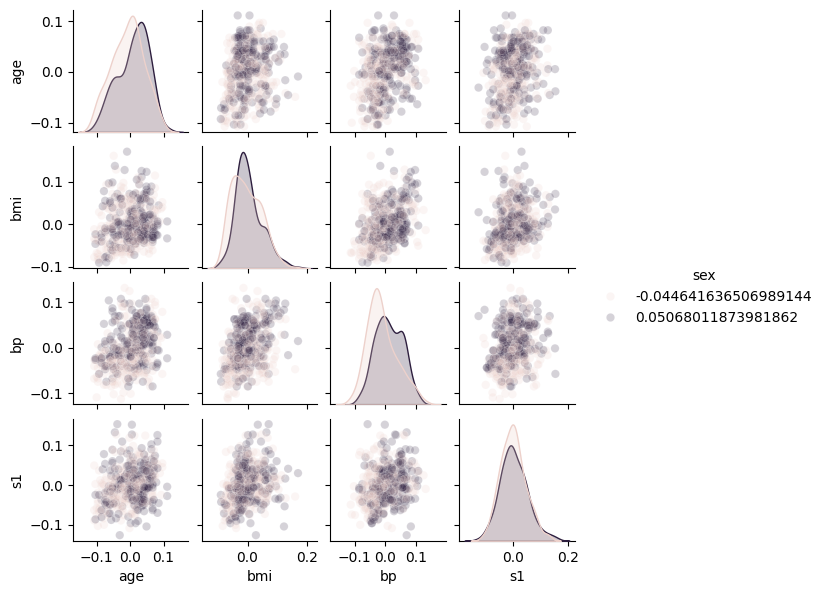

In [4]:
sns.pairplot(diabetes_df[['age', 'sex', 'bmi', 'bp', 's1']],
size=1.5, hue='sex', plot_kws={'alpha':.2});

In [5]:
values = np.array([1, 3, 5, 8, 11, 13, 15])
print("no outlier")
print(np.mean(values),np.median(values))

values_with_outlier = np.array([1, 3, 5, 8, 11, 13, 40])
print("with outlier")
print("%5.2f" % np.mean(values_with_outlier), np.median(values_with_outlier))

no outlier
8.0 8.0
with outlier
11.57 8.0


In [6]:
distances = np.array([2.0, 4.0, 4.0])
closeness = 1.0 / distances # element-by-element division
print(closeness)
print(np.sum(closeness))
weights = closeness / np.sum(closeness)# normalize sum to one
weights

[0.5  0.25 0.25]
1.0


array([0.5 , 0.25, 0.25])

In [7]:
values = np.array([4, 6, 8])
mean = np.mean(values)
wgt_mean = np.dot(values, weights)
print("Mean:", mean)
print("Weighted Mean:", wgt_mean)

Mean: 6.0
Weighted Mean: 5.5


In [8]:
knn= neighbors.KNeighborsRegressor(n_neighbors=3)
fit= knn.fit(diabetes_train_ftrs, diabetes_train_tgt)
preds = fit.predict(diabetes_test_ftrs)
# evaluate our predictions against the held-back testing targets
metrics.mean_squared_error(diabetes_test_tgt, preds)

3471.41941941942

In [9]:
diabetes_df['target'].max() - diabetes_df['target'].min()

321.0

In [10]:
def axis_helper(ax, lims):
  'clean up axes'
  ax.set_xlim(lims); ax.set_xticks([])
  ax.set_ylim(lims); ax.set_yticks([])
  ax.set_aspect('equal')

In [11]:
# our data is very simple: two (x, y) points
D = np.array([[3, 5],
[4, 2]])
# we'll take x as our "input" and y as our "output"
x, y = D[:, 0], D[:, 1]

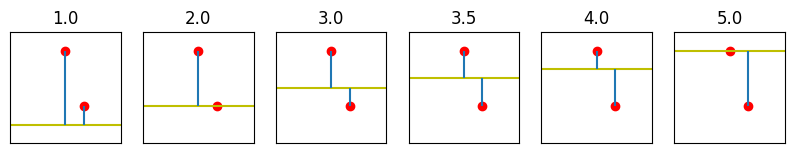

In [12]:
horizontal_lines = np.array([1, 2, 3, 3.5, 4, 5])
results = []
fig, axes = plt.subplots(1, 6, figsize=(10, 5))
for h_line, ax in zip(horizontal_lines, axes.flat):
    # styling
    axis_helper(ax, (0, 6))
    ax.set_title(str(h_line))
    # plot the data
    ax.plot(x, y, 'ro')
    # plot the prediction line
    ax.axhline(h_line, color='y') # ax coords; defaults to 100%

    # plot the errors
    # the horizontal line *is* our prediction; renaming for clarity
    predictions = h_line
    ax.vlines(x, predictions, y)
    # calculate the error amounts and their sum of squares
    errors = y - predictions
    sse = np.dot(errors, errors)
    # put together some results in a tuple
    results.append((predictions,
                    errors, errors.sum(),
                    sse, np.sqrt(sse)))

In [13]:
col_labels = "Prediction", "Errors", "Sum", "SSE", "Distance"
display(pd.DataFrame.from_records(results,
          columns=col_labels,
          index="Prediction"))


,Errors,Sum,SSE,Distance
Prediction,,,,
1.0000,"[4.0, 1.0]",5.0000,17.0000,4.1231
2.0000,"[3.0, 0.0]",3.0000,9.0000,3.0000
3.0000,"[2.0, -1.0]",1.0000,5.0000,2.2361
3.5000,"[1.5, -1.5]",0.0000,4.5000,2.1213
4.0000,"[1.0, -2.0]",-1.0000,5.0000,2.2361
5.0000,"[0.0, -3.0]",-3.0000,9.0000,3.0000


In [14]:
lr= linear_model.LinearRegression()
fit= lr.fit(diabetes_train_ftrs, diabetes_train_tgt)
preds = fit.predict(diabetes_test_ftrs)
# evaluate our predictions against the unseen testing targets
metrics.mean_squared_error(diabetes_test_tgt, preds)

2848.3106508475053

In [15]:
tgt = np.array([3, 5, 8, 10, 12, 15])

num_steps = 1000
step_size = .02
best_guess = np.random.uniform(low=tgt.min(), high=tgt.max())
best_dist = np.sum((tgt - best_guess)**2)
print("start:", best_guess)
for s in range(num_steps):
    # np.newaxis is needed to align the minus
    guesses = best_guess + (np.array([-1, 1]) * step_size)
    dists = np.sum((tgt[:,np.newaxis] - guesses)**2, axis=0)
    better_idx = np.argmin(dists)
    
    if dists[better_idx] > best_dist:
      break
    best_guess = guesses[better_idx]
    best_dist = dists[better_idx]
print("end:", best_guess)

start: 10.885335942002001
end: 8.825335942002045


In [16]:
print("mean:", np.mean(tgt))

mean: 8.833333333333334


In [17]:
from sklearn import (datasets, neighbors,
                      model_selection as skms,
                      linear_model, metrics)

diabetes = datasets.load_diabetes()
tts = skms.train_test_split(diabetes.data,
      diabetes.target,
      test_size=.25)

(diabetes_train, diabetes_test,
diabetes_train_tgt, diabetes_test_tgt) = tts

models = {'kNN': neighbors.KNeighborsRegressor(n_neighbors=3),
          'linreg' : linear_model.LinearRegression()}

for name, model in models.items():
    fit = model.fit(diabetes_train, diabetes_train_tgt)
    preds = fit.predict(diabetes_test)

    score = np.sqrt(metrics.mean_squared_error(diabetes_test_tgt, preds))
    print("{:>6s} : {:0.2f}".format(name,score))

   kNN : 56.81
linreg : 48.99


## Evaluate the data

In [18]:
N = 20
ftr = np.linspace(-10, 10, num=N)
# ftr values
tgt = 2*ftr**3 - 3 + np.random.uniform(-2, 2, N) # tgt = func(ftr)
(train_ftr, test_ftr,
train_tgt, test_tgt) = skms.train_test_split(ftr, tgt, test_size=N//2)
display(pd.DataFrame({"ftr":train_ftr,
"tgt":train_tgt}).T)

,0,1,2,3,4,5,6,7,8,9
ftr,0.5263,5.7895,-8.9474,-4.7368,7.8947,-6.8421,-5.7895,-2.6316,-7.8947,-1.5789
tgt,-2.7154,384.5646,"-1,434.6231",-216.0523,982.5117,-643.2720,-390.8454,-37.8499,-986.8775,-10.4426


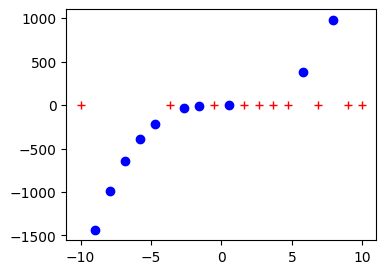

In [19]:
plt.plot(train_ftr, train_tgt, 'bo')
plt.plot(test_ftr,
np.zeros_like(test_ftr), 'r+');

In [20]:
# note: sklearn *really* wants 2D inputs (a table)
# so we use rehape here.
sk_model = linear_model.LinearRegression()
sk_model.fit(train_ftr.reshape(-1, 1), train_tgt)
sk_preds = sk_model.predict(test_ftr.reshape(-1, 1))
sk_preds[:3]

array([ 801.8123,  -23.3704, -377.0201])

In [21]:
test_tgt[:3]

array([ 637.5694,   -4.3142, -103.6648])

In [22]:
model_one = np.poly1d(np.polyfit(train_ftr, train_tgt, 1))
preds_one = model_one(test_ftr)
print(preds_one[:3])

[ 801.8123  -23.3704 -377.0201]


In [23]:
# the predictions come back the same
print("all close?", np.allclose(sk_preds, preds_one))
# and we can still use sklearn to evaluate it
mse = metrics.mean_squared_error
print("RMSE:", np.sqrt(mse(test_tgt, preds_one)))

all close? True
RMSE: 468.08280453769


In [24]:
# fit-predict-evaluate a 2D polynomial (a parabola)
model_two = np.poly1d(np.polyfit(train_ftr, train_tgt, 2))
preds_two = model_two(test_ftr)
print("RMSE:", np.sqrt(mse(test_tgt, preds_two)))

RMSE: 552.2085991037584


In [25]:
model_three = np.poly1d(np.polyfit(train_ftr, train_tgt, 9))
preds_three = model_three(test_ftr)
print("RMSE:", np.sqrt(mse(test_tgt, preds_three)))

RMSE: 3547.0699454583914


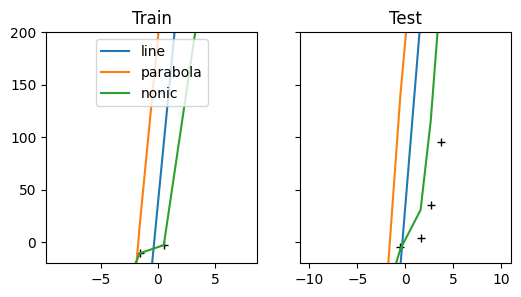

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(6, 3), sharey=True)
labels = ['line', 'parabola', 'nonic']
models = [model_one, model_two, model_three]
train = (train_ftr, train_tgt)
test = (test_ftr, test_tgt)


for ax, (ftr, tgt) in zip(axes, [train, test]):
  ax.plot(ftr, tgt, 'k+')
  for m, lbl in zip(models, labels):
    ftr = sorted(ftr)
    ax.plot(ftr, m(ftr), '-', label=lbl)


axes[1].set_ylim(-20, 200)
axes[0].set_title("Train")
axes[1].set_title("Test")
axes[0].legend(loc='upper center')

In [27]:
results = []
for complexity in [1, 2, 6, 9]:
    model = np.poly1d(np.polyfit(train_ftr, train_tgt, complexity))
    train_error = np.sqrt(mse(train_tgt, model(train_ftr)))
    test_error = np.sqrt(mse(test_tgt, model(test_ftr)))
    results.append((complexity, train_error, test_error))

columns = ["Complexity", "Train Error", "Test Error"]
results_df = pd.DataFrame.from_records(results,
              columns=columns,
              index="Complexity")
results_df

,Train Error,Test Error
Complexity,,
1,232.8270,468.0828
2,194.7865,552.2086
6,0.3806,2.9282
9,0.0000,"3,547.0699"


<Axes: xlabel='Complexity'>

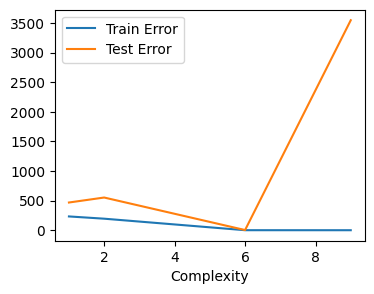

In [28]:
results_df.plot()

In [30]:
def training_loss(loss, model, training_data):
      ' total training_loss on train_data with model under loss'
      return sum(loss(model.predict(x.reshape(1, -1)), y)
                  for x, y in training_data)
def squared_error(prediction, actual):
    ' squared error on a single exampl'
    return (prediction - actual)**2

In [31]:
knn = neighbors.KNeighborsRegressor(n_neighbors=3)
fit = knn.fit(diabetes.data, diabetes.target)
training_data = zip(diabetes.data, diabetes.target)
my_training_loss = training_loss(squared_error,
              knn,
              training_data)
print(my_training_loss)

[863792.3333]


In [32]:
mse = metrics.mean_squared_error(diabetes.target,
                                knn.predict(diabetes.data))
print(mse*len(diabetes.data))

863792.3333333333


In [33]:
def complexity(model):
    return model.complexity

def cost(model, training_data, loss, _lambda):
    return training_loss(m,D) + _lambda * complexity(m)

In [45]:
model = neighbors.KNeighborsRegressor(10)
skms.cross_val_score(model,
diabetes.data,
diabetes.target,
cv=5,
scoring='neg_mean_squared_error')

array([-3206.7542, -3426.4313, -3587.9422, -3039.4944, -3282.6016])

In [46]:
iris = datasets.load_iris()
model = neighbors.KNeighborsClassifier(10)
skms.cross_val_score(model, iris.data, iris.target, cv=5)

array([0.9667, 1.    , 1.    , 0.9333, 1.    ])

In [47]:
# not stratified
pet = np.array(['cat', 'dog', 'cat',
                'dog', 'dog', 'dog'])
list_folds = list(skms.KFold(2).split(pet))
training_idxs = np.array(list_folds)[:, 0, :]
print(pet[training_idxs])

[['dog' 'dog' 'dog']
 ['cat' 'dog' 'cat']]


In [50]:
# stratified
# note: typically this is behind the scenes
# making StratifiedKFold produce readable output
# requires some trickery. feel free to ignore.
pet = np.array(['cat', 'dog', 'cat', 'dog', 'dog', 'dog'])
idxs = np.array(list(skms.StratifiedKFold(2)
                .split(np.ones_like(pet), pet)))
training_idxs = idxs[:, 0, :]
print(pet[training_idxs])

[['cat' 'dog' 'dog']
 ['cat' 'dog' 'dog']]


In [51]:
# running nonstratified CV
iris = datasets.load_iris()
model = neighbors.KNeighborsClassifier(10)
non_strat_kf = skms.KFold(5)
skms.cross_val_score(model,
            iris.data,
            iris.target,
            cv=non_strat_kf)

array([1.    , 1.    , 0.8667, 0.9667, 0.7667])

In [52]:
linreg = linear_model.LinearRegression()
diabetes = datasets.load_diabetes()
scores = []
for r in range(10):
    tts = skms.train_test_split(diabetes.data,
                                diabetes.target,
                                test_size=.25)
    (diabetes_train_ftrs, diabetes_test_ftrs,
      diabetes_train_tgt,
      diabetes_test_tgt) = tts
    
    fit = linreg.fit(diabetes_train_ftrs, diabetes_train_tgt)
    preds = fit.predict(diabetes_test_ftrs)
    score = metrics.mean_squared_error(diabetes_test_tgt, preds)
    scores.append(score)
    
scores = pd.Series(np.sqrt(sorted(scores)))
df = pd.DataFrame({'RMSE':scores})
df.index.name = 'Repeat'
display(df.T)

Repeat,0,1,2,3,4,5,6,7,8,9
RMSE,51.8929,52.8207,53.2745,53.6030,54.8575,55.8232,58.6226,59.5771,60.4313,60.4747


Text(0.5, 17.722222222222214, 'Over Repeated\nTrain-Test Splits')

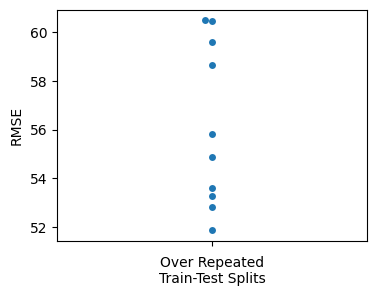

In [53]:
ax = plt.figure(figsize=(4, 3)).gca()
sns.swarmplot(y='RMSE', data=df, ax=ax)
ax.set_xlabel('Over Repeated\nTrain-Test Splits')

In [54]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
RMSE,10.0000,56.1378,3.3438,51.8929,53.3566,55.3403,59.3385,60.4747


In [55]:
def tts_fit_score(model, data, msr, test_size=.25):
    ' apply a train-test split to fit model on data and eval with MSR '
    tts = skms.train_test_split(data.data,
                                data.target,
                                test_size=test_size)
    (train_ftrs, test_ftrs, train_tgt,
    test_tgt) = tts

    fit = linreg.fit(train_ftrs, train_tgt)
    preds = fit.predict(test_ftrs)

    score = msr(test_tgt, preds)
    return score
linreg = linear_model.LinearRegression()
diabetes = datasets.load_diabetes()
scores = [tts_fit_score(linreg, diabetes,
          metrics.mean_squared_error) for i in range(10)]
print(np.mean(scores))

3038.4956035857717


,count,mean,std,min,25%,50%,75%,max
RMSE,10.0000,55.8933,3.6600,50.2159,52.8203,56.4710,58.5427,61.0759


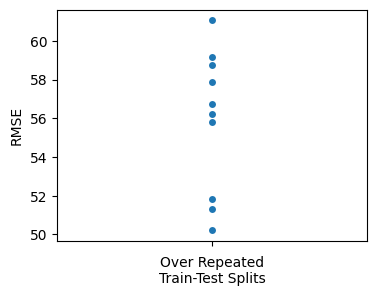

In [56]:
linreg = linear_model.LinearRegression()
diabetes = datasets.load_diabetes()

# nondefault cv= argument
ss = skms.ShuffleSplit(test_size=.25) # default, 10 splits
scores = skms.cross_val_score(linreg,
          diabetes.data, diabetes.target,
          cv=ss,
          scoring='neg_mean_squared_error')

scores = pd.Series(np.sqrt(-scores))
df = pd.DataFrame({'RMSE':scores})
df.index.name = 'Repeat'
display(df.describe().T)

ax = sns.swarmplot(y='RMSE', data=df)
ax.set_xlabel('Over Repeated\nTrain-Test Splits');

In [57]:
ss = skms.ShuffleSplit(test_size=.25, random_state=42)
train, test = 0, 1
next(ss.split(diabetes.data))[train][:10]

array([ 16, 408, 432, 316,   3,  18, 355,  60, 398, 124])

In [58]:
ss = skms.ShuffleSplit(test_size=.25, random_state=42)
next(ss.split(diabetes.data))[train][:10]

array([ 16, 408, 432, 316,   3,  18, 355,  60, 398, 124])

In [59]:
train, test = 0, 1
kf = skms.KFold(5)
next(kf.split(diabetes.data))[train][:10]

array([89, 90, 91, 92, 93, 94, 95, 96, 97, 98])

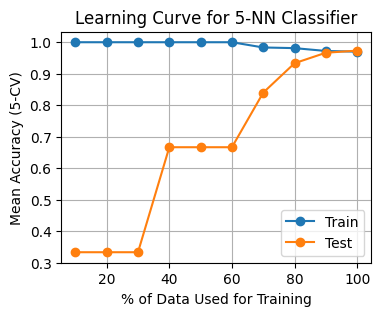

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, neighbors, model_selection as skms

# Load the Iris dataset
iris = datasets.load_iris()

# Define training sizes (10% to 100%)
train_sizes = np.linspace(.1, 1.0, 10)

# Define the K-Nearest Neighbors classifier
nn = neighbors.KNeighborsClassifier()

# Get the learning curve data
train_N, train_scores, test_scores = skms.learning_curve(
    nn, iris.data, iris.target, cv=5, train_sizes=train_sizes
)

# Collapse across the 5 CV scores, calculating the mean for each data set size
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot using matplotlib
plt.plot(train_sizes * 100, train_scores_mean, label='Train', marker='o')
plt.plot(train_sizes * 100, test_scores_mean, label='Test', marker='o')

# Add titles and labels
plt.title("Learning Curve for 5-NN Classifier")
plt.xlabel("% of Data Used for Training")
plt.ylabel("Mean Accuracy (5-CV)")
plt.legend()

# Show grid and plot
plt.grid(True)
plt.show()


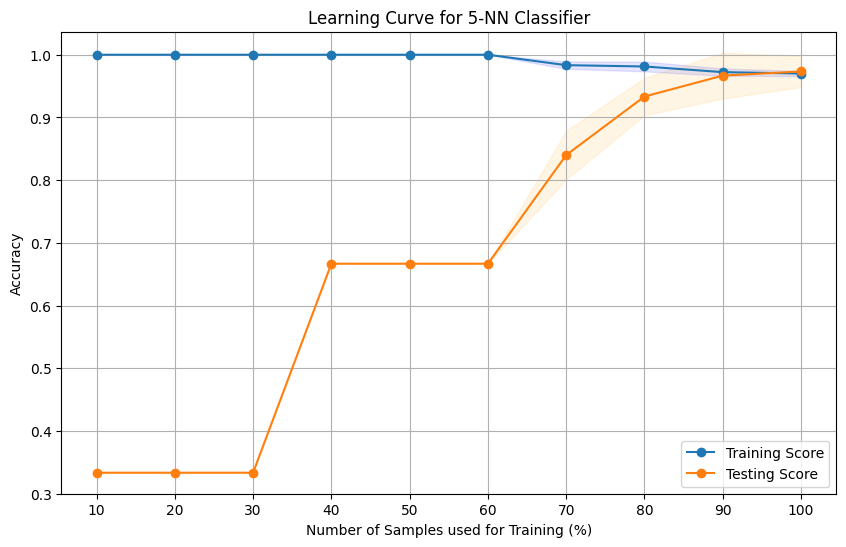

In [68]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, neighbors
from sklearn.model_selection import learning_curve

# Load the iris dataset
iris = datasets.load_iris()

# Define the training sizes (10% to 100%)
train_sizes = np.linspace(0.1, 1.0, 10)

# Initialize the KNeighborsClassifier model
nn = neighbors.KNeighborsClassifier()

# Generate learning curve data
train_N, train_scores, test_scores = learning_curve(nn, iris.data, iris.target, cv=5, train_sizes=train_sizes)

# Plotting
plt.figure(figsize=(10, 6))

# Plot training scores
plt.plot(train_sizes * 100, train_scores.mean(axis=1), label='Training Score', marker='o')
plt.fill_between(train_sizes * 100,
                 train_scores.mean(axis=1) - train_scores.std(axis=1),
                 train_scores.mean(axis=1) + train_scores.std(axis=1),
                 color='blue', alpha=0.1)

# Plot test scores
plt.plot(train_sizes * 100, test_scores.mean(axis=1), label='Testing Score', marker='o')
plt.fill_between(train_sizes * 100,
                 test_scores.mean(axis=1) - test_scores.std(axis=1),
                 test_scores.mean(axis=1) + test_scores.std(axis=1),
                 color='orange', alpha=0.1)

# Set titles and labels
plt.title("Learning Curve for 5-NN Classifier")
plt.xlabel("Number of Samples used for Training (%)")
plt.ylabel("Accuracy")
plt.xticks(np.arange(10, 110, 10))  # Set x-ticks
plt.grid()
plt.legend()
plt.show()

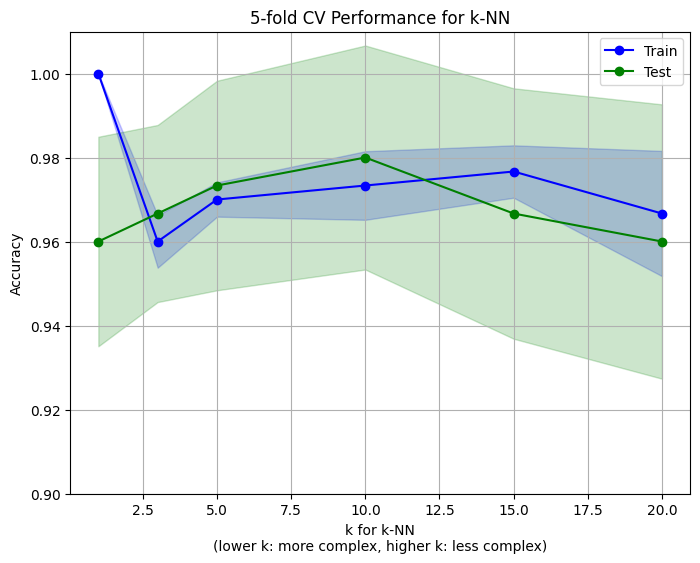

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, neighbors, model_selection as skms

# Load the Iris dataset
iris = datasets.load_iris()

# Define the parameter range for number of neighbors
num_neigh = [1, 3, 5, 10, 15, 20]

# Perform validation curve analysis
KNC = neighbors.KNeighborsClassifier
train_scores, test_scores = skms.validation_curve(
    KNC(), iris.data, iris.target,
    param_name='n_neighbors',
    param_range=num_neigh,
    cv=5
)

# Calculate mean and standard deviation of the scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

train_scores_std = np.std(train_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Create the plot using matplotlib
plt.figure(figsize=(8, 6))
plt.plot(num_neigh, train_scores_mean, label="Train", marker='o', color='b')
plt.fill_between(num_neigh, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color='b')

plt.plot(num_neigh, test_scores_mean, label="Test", marker='o', color='g')
plt.fill_between(num_neigh, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color='g')

# Add titles and labels
plt.title('5-fold CV Performance for k-NN')
plt.xlabel("k for k-NN\n(lower k: more complex, higher k: less complex)")
plt.ylabel('Accuracy')
plt.ylim(0.9, 1.01)
plt.legend(loc='best')

# Show grid and plot
plt.grid(True)
plt.show()
